In [14]:
import importlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import scipy.io
from principal_RBM_alpha import RBM
from principal_DBN_alpha import DBN
from principal_DNN_MNIST import DNN

In [9]:
'''
url = "https://www.cs.nyu.edu/~roweis/data/binaryalphadigs.mat"
r = requests.get(url, allow_redirects=True)
open('binaryalphadigs.mat', 'wb').write(r.content)
'''

'\nurl = "https://www.cs.nyu.edu/~roweis/data/binaryalphadigs.mat"\nr = requests.get(url, allow_redirects=True)\nopen(\'binaryalphadigs.mat\', \'wb\').write(r.content)\n'

In [10]:
def lire_alpha_digit(indexes):
    mat = scipy.io.loadmat("binaryalphadigs.mat")
    new_mat = mat['dat'][indexes]
    new_mat = new_mat.reshape(new_mat.shape[0] * new_mat.shape[1])

    new_new_mat = np.zeros((new_mat.shape[0], new_mat[0].shape[0] * new_mat[0].shape[1]))
    for i in range(len(new_mat)):
        new_new_mat[i] = new_mat[i].reshape(new_mat[i].shape[0] * new_mat[i].shape[1])
        
    return new_new_mat

## RBM Part

In [4]:
RBM_model = RBM(p=320, q=100)

In [11]:
data = lire_alpha_digit([5, 12, 21])

In [6]:
RBM_model.train_RBM(X=data, epsilon=0.1, batch_size=10, nb_epochs=100)

39.762089139367724
34.18940405119889
30.905374426781357
28.535718870864304
27.06964695492637
25.660427363022684
24.16026365300545
23.00753129493946
22.177740811321424
21.29050707573076
20.724633641799947
19.664838810086874
19.10535889621651
18.32131010358757
17.81991391640434
17.24497614553108
16.771906855679262
16.311212837163232
15.710747818262112
15.560764274267909
14.93732375441068
14.604729178010565
14.240995968168654
13.833321308493003
13.52059229313319
13.28454075474467
13.051634894498
12.697378868101298
12.353924275967742
12.07923642698961
11.837190981055086
11.579611241043589
11.223631657020443
10.93207858919763
10.834199490630102
10.528709758926958
10.304188905208658
10.175020924400894
9.866148224977712
9.638018076479863
9.424261890463939
9.292626690979747
9.070948135268628
8.943990770632684
8.833332126296922
8.647725297990984
8.394848176822164
8.189489315230905
8.180137837156492
8.066463125713927
7.7604745056766005
7.680766036869379
7.67713781914491
7.3784007597395505
7.3116

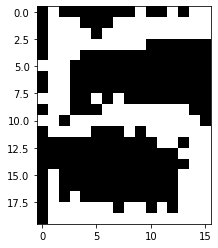

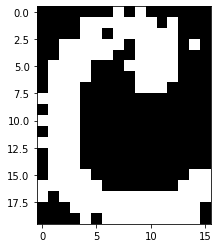

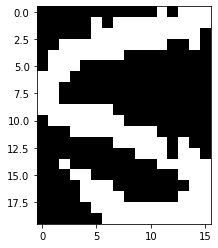

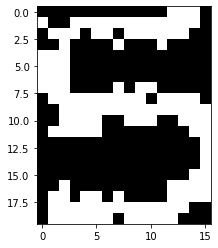

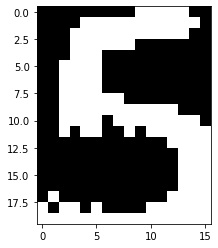

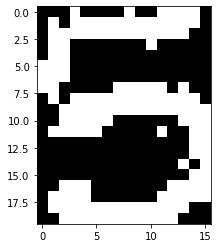

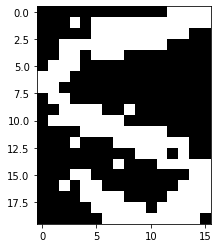

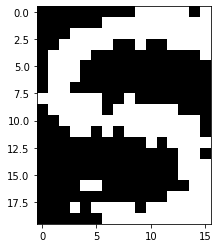

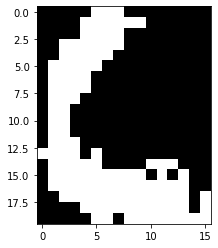

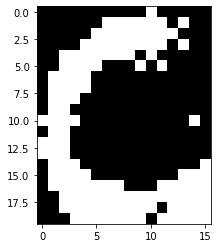

In [7]:
RBM_model.generer_image_RBM(10, 100)

## DBN Part

In [8]:
DBN_model = DBN(config=[320, 100, 50, 100])

In [9]:
data = lire_alpha_digit([5, 12, 21])

In [10]:
DBN_model.train_DBN(X=data, epsilon=0.1, batch_size=10, nb_epochs=100)

40.37563647113416
34.89682556555087
31.793130386560367
29.620104384755432
27.63261749433424
26.212375467526655
25.219212225099692
23.80087951463982
23.08822600868786
21.99349199045242
20.998830459750554
20.370012908578563
19.723763358529094
18.827350866969653
18.71476544850943
17.844840288570506
17.404693746673363
16.90140117526666
16.28848744837737
15.856695738053384
15.410242177956253
15.08910107179393
14.65171141751267
14.221036621713104
13.875776011235883
13.724053027895854
13.268630943298952
12.982996316500955
12.6627827051045
12.332124906143441
12.092305467007522
12.008869804313482
11.648854435665449
11.329697125421585
11.279371938542408
11.103595295559275
10.628727621023728
10.39152760479873
10.216183731418955
10.19814244653492
9.950335700065196
9.776014152043999
9.599221398727238
9.22658422988956
9.168421991436517
8.979457245056437
8.870925486514334
8.666693627749144
8.610862223750848
8.364974779511709
8.301900281831958
8.159980889835257
8.01199906703714
8.001101581900206
7.744

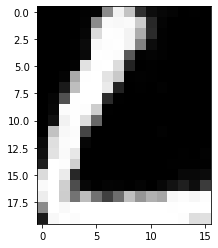

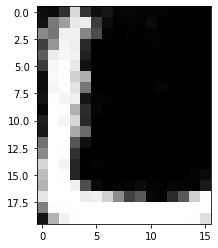

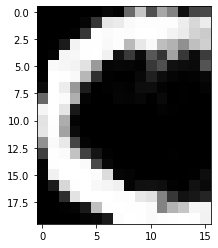

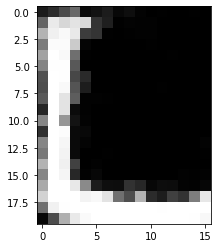

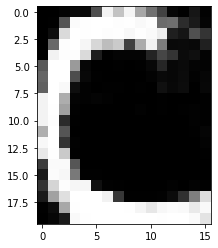

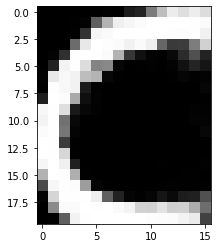

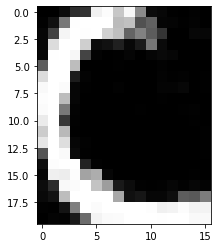

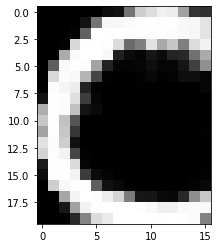

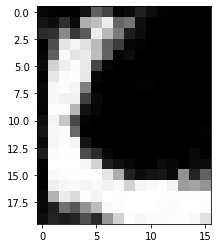

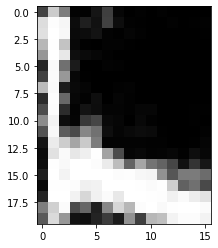

In [11]:
DBN_model.generer_image_DBN(10, 100)

## DNN Part

In [16]:
from mlxtend.data import loadlocal_mnist

X_train, y_train = loadlocal_mnist(images_path='data/train-images.idx3-ubyte',
                         labels_path='data/train-labels.idx1-ubyte')
X_test, y_test = loadlocal_mnist(images_path='data/t10k-images.idx3-ubyte',
                         labels_path='data/t10k-labels.idx1-ubyte')

# Binarisation of our data
X_train = (X_train >= 127).astype(int)
X_test = (X_test >= 127).astype(int)

In [19]:
dnn = DNN(config=[784, 100, 50, 10])
dnn.pretrain_DNN(X=X_train, epsilon=0.1, batch_size=32, nb_epochs=100)

/Users/agatheminaro/Documents/Master IP Paris/Semestre 2/Deep Learning II/Project/from-rbm-to-dnn/principal_RBM_alpha.py:14: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-X @ self.RBM_W + self.RBM_b))


391.92171046619177
464.19685229898147


/Users/agatheminaro/Documents/Master IP Paris/Semestre 2/Deep Learning II/Project/from-rbm-to-dnn/principal_RBM_alpha.py:17: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-H @ self.RBM_W.T + self.RBM_a))


467.1603724390542
461.00529440344997
478.31304242634377
469.2138634941156
471.72133322271
468.26571559059755
472.9158104710097
469.6520251746603
468.8834038425502
470.5153402295823
470.2642927584579
467.86176922319873
466.93737691588547
467.2465748941454
467.7971443746161
465.84818177812554
466.9648200089286
470.45095182901434
467.3044203342652
465.21403056429915
466.60405214711676
465.01071917051456
466.06017671246957
467.76713818636404
466.4077032073886
466.2891279598363
465.8586038543236
465.20118045191236
464.4621991215406


In [2]:
loss = dnn.retropropagation(X=X_train, y=y_train, epsilon=0.1, batch_size=32, nb_epochs=200)